# Simulation of Projectile Motion in 2D - with air resistance

In order to understand how to solve this problem numerically, using Euler's method, the key idea is to be able to calculate the acceleration, in both the x- and y-directions, as a function of time.

We begin by approximating the air resitive force as:

\begin{equation}
\vec{F}_{air} = -\frac{1}{2} C_d \rho A v^2 \hat{v}
\end{equation}

where $\hat{v} = \frac{\vec{v}}{|\vec{v}|}$ is a unit vector in the direction of the current velocity of the object.  $C_d$ is the drag coefficient, and depends on details of the object and the flow conditions, $\rho$ is the density of air, and $A$ is the cross-sectional area of the object.

Of course, we also have the usual gravitional force, in the negative y-direction.  Thus, we can calculate the acceleration of the object, at any point in time, according to:

\begin{equation}
\vec{a} = - g\hat{j} - \frac{1}{2} \frac{C_d \rho A v^2}{m} \hat{v}
\end{equation}

From this we can determine the x- and y-components of the acceleration as:
\begin{equation}
a_x = - \frac{1}{2} \frac{C_d \rho A |v|}{m} v_x \\
a_y = - g - \frac{1}{2} \frac{C_d \rho A |v|}{m} v_y
\end{equation}



In [33]:
import numpy as np
import matplotlib.pyplot as plt

# The following lines make plots in dark mode look reasonable.  If you are not using dark
# mode you don't need them, but you can also just leave them here, but you will need to set
# dark_mode = False

dark_mode = True
# plotting choices for dark-mode
if (dark_mode):
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
    linecolor = 'w'
else:
    linecolor = 'k'

In [34]:
# Define the initial conditions of the motion
v0 = 50.0
theta_degrees = 45.0
y0 = 0.001

# Define the time interval, dt, for the simulation
dt = 0.001

###################################################################$
####### Should be no need for changes below here, by users #########
####################################################################

theta = theta_degrees*np.pi/180.0
x0 = 0.0
v0y = v0*np.sin(theta)
v0x = v0*np.cos(theta)

# Other constants - golf ball - D = 0.0427m, m = 0.04593kg
Cd = 0.20 # drag coefficient
area = 0.001432 # cross sectional area of projectile
mass = 0.04593 # mass in kg
rho = 1.225 # density of air (kg/m^3)
air_const = -0.5*Cd*rho*area/mass

g = 9.799 # gravitational acceleration

In [35]:
# Define the time interval, dt, for the simulation
dt = 0.0001

y = []
x = []
t = []
vy = []
vx = []

yNoAir = []
xNoAir = []
vyNoAir = []
vxNoAir = []
tNoAir = []

y.append(y0)
x.append(x0)
vy.append(v0y)
vx.append(v0x)
t.append(0.0)

yNoAir.append(y0)
xNoAir.append(x0)
vyNoAir.append(v0y)
vxNoAir.append(v0x)
tNoAir.append(0.0)

y_current = y[0]
x_current = x[0]
vy_current = vy[0]
vx_current = vx[0]
t_current = t[0]

y_currentNoAir = y[0]
x_currentNoAir = x[0]
vy_currentNoAir = vy[0]
vx_currentNoAir = vx[0]

n=1
while (y_currentNoAir > 0):
    
    y_currentNoAir += vy_currentNoAir*dt
    x_currentNoAir += vx_currentNoAir*dt
    
    if y_current > 0:
        y_current += vy_current*dt
        x_current += vx_current*dt
        
    normV = np.sqrt(vx_current**2+vy_current**2)
    ax = air_const*normV*vx_current
    ay = -g + air_const*normV*vy_current
                      
    axNoAir = 0.0
    ayNoAir = -g
                      
    if y_current > 0:
        vy_current += ay*dt
        vx_current += ax*dt
    else:
        vy_current = 0
        vx_current = 0
        
    vy_currentNoAir += ayNoAir*dt
    vx_currentNoAir += axNoAir*dt
                      
    t_current += dt

    #if y_current > 0:
    y.append(y_current)
    x.append(x_current)
    vy.append(vy_current)
    vx.append(vx_current)
    t.append(t_current)
    
    yNoAir.append(y_currentNoAir)
    xNoAir.append(x_currentNoAir)
    vyNoAir.append(vy_currentNoAir)
    vxNoAir.append(vx_currentNoAir)
    tNoAir.append(t_current)
                      
    n = n + 1


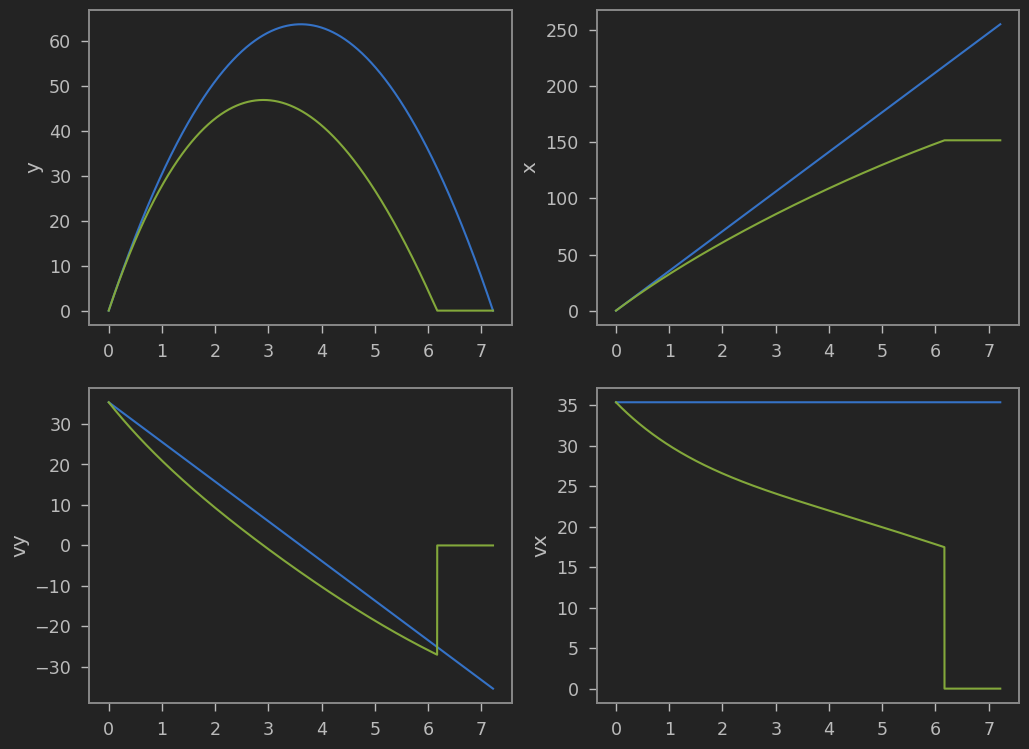

In [36]:
import matplotlib.pyplot as plt

# Generate the figure and the axes 
plt.rcParams["figure.figsize"] = (12,9)

fig, axs = plt.subplots(nrows=2, ncols=2) 

# On the first axis, plot the y value 
axs[0][0].plot(tNoAir,yNoAir) 
axs[0][0].plot(t,y) 
axs[0][0].set_ylabel('y') 

# On the second axis, plot the vy value 
axs[1][0].plot(tNoAir,vyNoAir) 
axs[1][0].plot(t,vy) 
axs[1][0].set_ylabel('vy')

# On the third axis, plot the x value 
axs[0][1].plot(tNoAir,xNoAir) 
axs[0][1].plot(t,x) 
axs[0][1].set_ylabel('x') 

# On the fourth axis, plot the vx value 
axs[1][1].plot(tNoAir,vxNoAir) 
axs[1][1].plot(t,vx) 
axs[1][1].set_ylabel('vx')

plt.show()

In [37]:
from matplotlib import animation
from IPython.display import HTML
import numpy as np

FPS=30
plt.style.use('default')

x = np.array(x)
y = np.array(y)
xNoAir = np.array(xNoAir)
yNoAir = np.array(yNoAir)
xm = xNoAir.min()
xp = xNoAir.max()
ym = yNoAir.min()
yp = yNoAir.max()

# Set up the figure
fig = plt.figure(figsize=(10, 5), dpi=60)

if (xp>yp):
    ax = plt.axes(xlim=(xm, xp), ylim=(xm/2, xp/2))
else:
    ax = plt.axes(xlim=(ym, yp), ylim=(ym/2, yp/2))
ax.set_aspect('equal')
ax.axis('on')

# Define the different elements in the animation
ball1 = plt.Circle((x[0], y[0]), xp/150.0, fc="black")
ball2 = plt.Circle((xNoAir[0], yNoAir[0]), xp/150.0, fc="red")
ax.add_patch(ball1)
ax.add_patch(ball2)


# Calculates the number of frames
framesNum = int(FPS*t[-1])+1

# Animation function. This is called sequentially.
def animate(j):
    i = j*int(n/framesNum)
    ball1.center = (x[i], y[i])
    ball2.center = (xNoAir[i], yNoAir[i])
    
# Create animation
anim = animation.FuncAnimation(fig, animate, frames=framesNum, interval=1000/FPS, repeat=False)
plt.close(anim._fig)

# Display the animation
HTML(anim.to_html5_video())